<a href="https://colab.research.google.com/github/rainaa0277/Fashion-Class-Classfication-using-ANN/blob/main/Fashion_Classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJECTIVE : Fashion Class Classfication using ANN**

Fashion training set consist of 70,000 images divided into 60,000 training and 10,000 testing samples.  Dataset samples consists of 28x28 grayscale image associated with a label from 10 calsses.

The top 10 callases as follows : <br>
    
0 -> T-shirts <br>
1 -> Trouser <br>
2 -> Pullover <br>
3 -> Dress <br>
4 -> Coat <br>
5 -> Sandel <br>
6 -> Shirt <br>
7 -> Sneaker <br>
8 -> Bag <br>
9 -> Ankle boot <br>

Each Image is 28 pixel in hight and 28 pixel in width, for a total of 784 pixels in total. Each pixel has a
single Pixel value associated with it, indicating the lightness or darkness of the pixel. Higher number 
means darker piexl. The pixel value is an integer Between 0 and 255

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
pip install tensorflow==2.0.0

Step1 - Import necessary libraries

In [3]:
# Import libraries and packages
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
import time   # time1 = time.time(); print('Time taken: {:.1f} seconds'.format(time.time() - time1))
import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

warnings.filterwarnings("ignore")
SEED = 42   # set random seed

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)

In [6]:
from google.colab import drive

In [8]:
# change working DIR

import os
os.chdir("/content/drive/MyDrive/Deep Learning/Project 2 - Fashion MNIST CNN")

In [9]:
!dir

Fashion\ Classification\ ANN.home  fashion-mnist_train.csv
fashion-mnist_test.csv		   Fashion\ MNIST\ using\ ANN.ipynb


Step2 - Import Data

In [10]:
fashion_training_df = pd.read_csv('fashion-mnist_train.csv')
fashion_testing_df = pd.read_csv('fashion-mnist_test.csv')

In [11]:
# Basically this dataset is 28x28 = 784(features) and each row corresponds to an image
fashion_training_df                         

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [12]:
fashion_testing_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [13]:
fashion_training_df.shape

(60000, 785)

In [14]:
fashion_testing_df.shape

(10000, 785)

In [15]:
#Converting the train and test into array because we need to reshape and flatten the images

training = np.array(fashion_training_df, dtype='float32')
testing = np.array(fashion_testing_df, dtype='float32')

Step2: Data Visualization

6.0


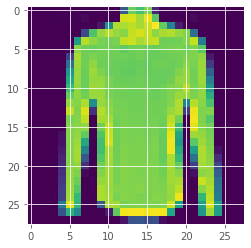

In [40]:
image = random.randint(0,60000)
plt.imshow(training[image,1:].reshape(28,28))
label = training[image,0]
print(label)

View more images in grid format

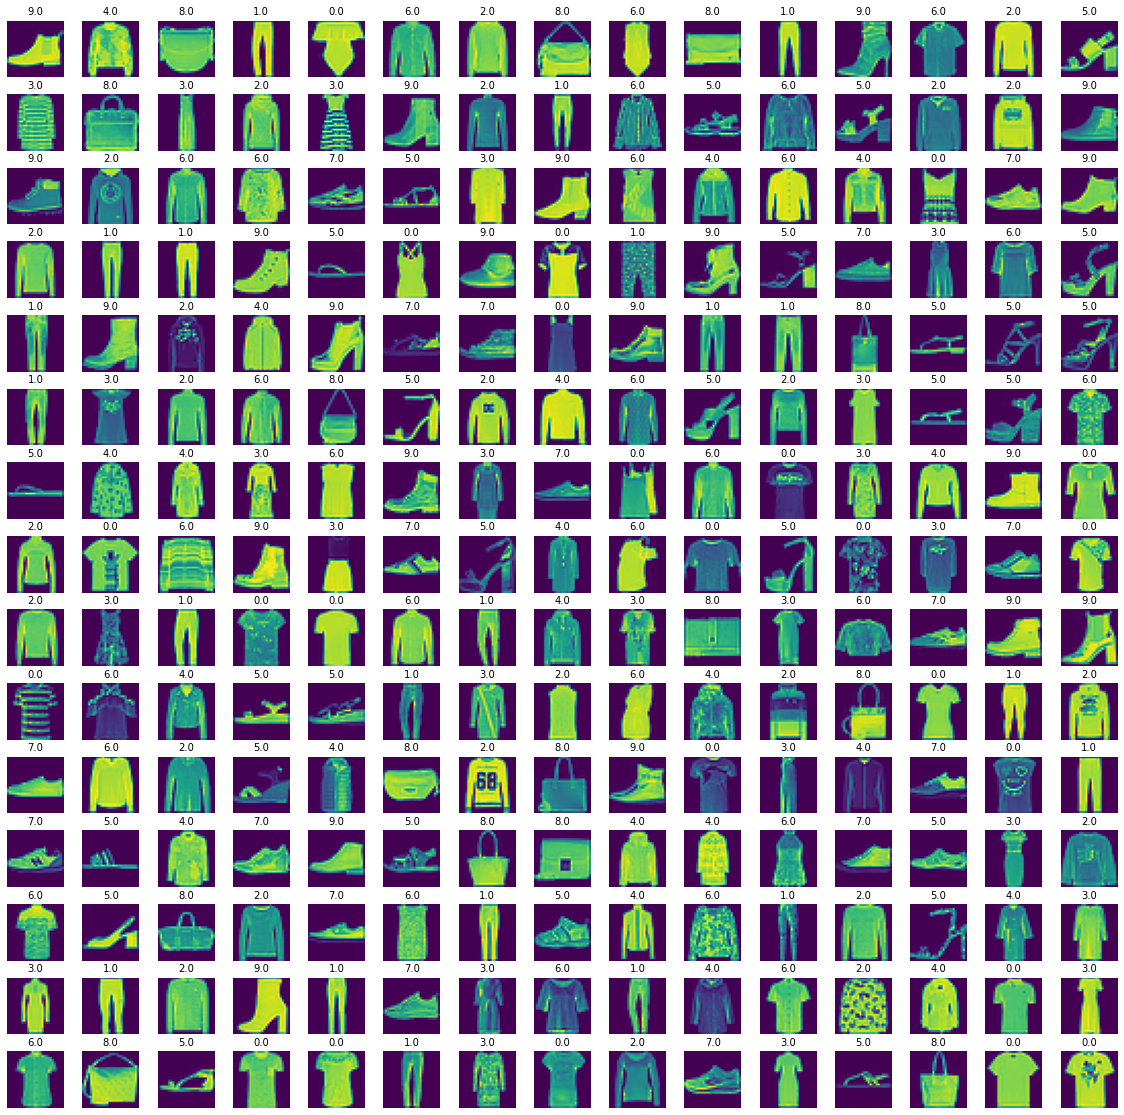

In [17]:
# Define the dimention of the plot grid
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid, w_grid , figsize = (20,20))

axes=axes.flatten() # flatern the 15 x 15 matrix into 255 array

n_training = len(training) # get the lenght of the training dataset 

#select a random number from 0 to n_training
for i in np.arange(0, w_grid*l_grid) : # create evenly space variables
    
    # Select a random number 
    index = np.random.randint(0, n_training)
    # read and display the image with the selected index
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize=10)
    axes[i].axis("off")
    
plt.subplots_adjust(hspace=0.3)

Step3: Data Partition

In [18]:
X_train = training[:,1:]/255 #to normalize the data

y_train = training[:,0]

X_test = testing[:,1:]/255

y_test = testing[:, 0]

In [19]:
x_train , x_validate , y_train , y_validate = train_test_split(X_train , y_train, test_size=0.2, random_state=1234)

In [20]:
print(x_train.shape)
print(x_validate.shape)
print(y_train.shape)
print(y_validate.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


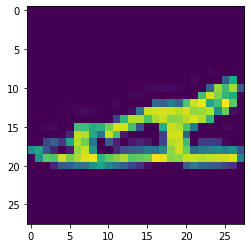

In [21]:
sample_img = (x_train[9]*255).astype("int")
plt.imshow(sample_img.reshape(28,28))

In [22]:
y_train[9]

5.0

Step4: Creating ANN Architecture (Forward Propagation)

In [23]:
model = Sequential()

#Input layer and hidden layer with 390 nodes
model.add(Dense(units= 390, input_shape=(784,), kernel_initializer="uniform",activation="relu"))


model.add(Dense(units = 195, kernel_initializer="uniform", activation="relu"))

model.add(Dense(units=10, kernel_initializer="uniform", activation="softmax"))

Step5: Compiling the model (Backward Propagation)

In [24]:
learn_rate = 0.02
EPOCHS = 40

opt = SGD(learning_rate=learn_rate)

model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 390)               306150    
                                                                 
 dense_1 (Dense)             (None, 195)               76245     
                                                                 
 dense_2 (Dense)             (None, 10)                1960      
                                                                 
Total params: 384,355
Trainable params: 384,355
Non-trainable params: 0
_________________________________________________________________


Step6: Training the model

In [26]:
y_train

array([7., 0., 7., ..., 4., 3., 9.], dtype=float32)

In [27]:
import time
time1 = time.time()

trained_model = model.fit(x_train,y_train, validation_data= (x_validate,y_validate) , epochs=EPOCHS, batch_size=50)
print(f'time_taken{(time.time()-time1):.1f}seconds')

Epoch 1/40
960/960 [==============================] - 5s 3ms/step - loss: 1.0467 - accuracy: 0.6548 - val_loss: 0.6670 - val_accuracy: 0.7564
Epoch 2/40
960/960 [==============================] - 3s 3ms/step - loss: 0.5786 - accuracy: 0.7968 - val_loss: 0.5332 - val_accuracy: 0.8163
Epoch 3/40
960/960 [==============================] - 5s 5ms/step - loss: 0.5029 - accuracy: 0.8224 - val_loss: 0.5357 - val_accuracy: 0.8127
Epoch 4/40
960/960 [==============================] - 4s 5ms/step - loss: 0.4639 - accuracy: 0.8347 - val_loss: 0.4768 - val_accuracy: 0.8324
Epoch 5/40
960/960 [==============================] - 5s 5ms/step - loss: 0.4388 - accuracy: 0.8451 - val_loss: 0.4317 - val_accuracy: 0.8502
Epoch 6/40
960/960 [==============================] - 5s 5ms/step - loss: 0.4197 - accuracy: 0.8519 - val_loss: 0.4205 - val_accuracy: 0.8522
Epoch 7/40
960/960 [==============================] - 4s 5ms/step - loss: 0.4021 - accuracy: 0.8573 - val_loss: 0.4026 - val_accuracy: 0.8561
Epoch 

In [28]:
y_pred = model.predict(X_test, batch_size=50)
y_pred

array([[6.77687407e-01, 2.51371119e-07, 8.57326377e-04, ...,
        1.80897564e-09, 1.09441484e-04, 4.95738284e-10],
       [6.16444140e-07, 9.99999166e-01, 6.87995483e-09, ...,
        1.97950698e-10, 1.24781718e-09, 7.05393660e-11],
       [1.99299827e-02, 7.76690722e-04, 8.26508641e-01, ...,
        6.42287068e-06, 1.33491738e-03, 2.76723586e-04],
       ...,
       [5.28605437e-10, 8.81252276e-12, 1.94201391e-10, ...,
        1.01721348e-11, 1.00000000e+00, 3.21883091e-14],
       [2.42757034e-02, 3.37938459e-08, 2.75676517e-04, ...,
        5.14463538e-09, 7.96200097e-01, 1.12641430e-07],
       [2.82637251e-04, 7.46189535e-01, 1.98344178e-02, ...,
        8.36328695e-07, 7.92314124e-04, 1.66402197e-06]], dtype=float32)

In [ ]:
y_pred = [np.argmax(i) for i in y_pred]
y_pred

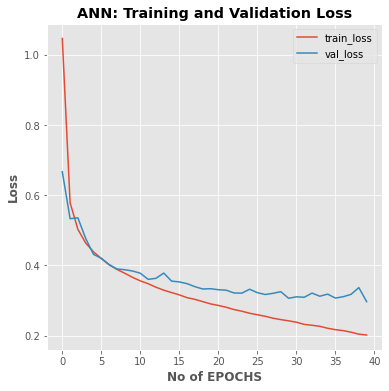

In [30]:
#Plot training and validation loss
N = np.arange(0,EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(6,6))
plt.plot(N,trained_model.history["loss"], label="train_loss")
plt.plot(N,trained_model.history["val_loss"], label = "val_loss")
plt.xlabel("No of EPOCHS", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.title("ANN: Training and Validation Loss", weight="bold")
plt.legend()
plt.show()

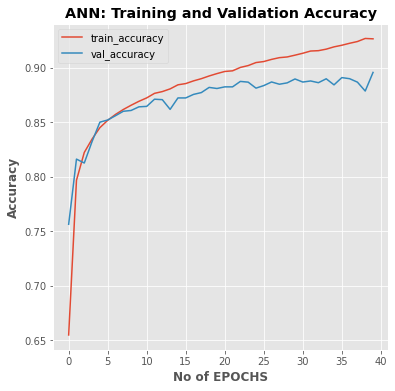

In [31]:
#Plot accuracy and validation accuracy
N = np.arange(0,EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(6,6))
plt.plot(N,trained_model.history["accuracy"], label="train_accuracy")
plt.plot(N,trained_model.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("No of EPOCHS", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.title("ANN: Training and Validation Accuracy", weight="bold")
plt.legend()
plt.show()

Step7: Evaluating the model

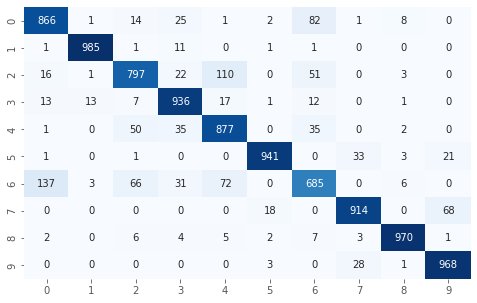

In [32]:
import seaborn as sns

#Plot confusion matrix to check predicted class and actual classes.
cm = confusion_matrix(y_test,y_pred)

conf_matrix = pd.DataFrame(cm, columns=["P:0","Predicted:1","Predicted:2","Predicted:3","Predicted:4",
                            "Predicted:5","Predicted:6","Predicted:7","Predicted:8","Predicted:9"], 
                           index = ["Actual:0","Actual:1","Actual:2","Actual:3","Actual:4","Actual:5","Actual:6","Actual:7",
                           "Actual:8","Actual:9"])
plt.figure(figsize=(8,5))
sns.heatmap(data=cm, annot=True, cmap=plt.cm.Blues,fmt="d", cbar=False)
plt.show()

In [33]:
#computing the classification score for all the classes
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85      1000
         1.0       0.98      0.98      0.98      1000
         2.0       0.85      0.80      0.82      1000
         3.0       0.88      0.94      0.91      1000
         4.0       0.81      0.88      0.84      1000
         5.0       0.97      0.94      0.96      1000
         6.0       0.78      0.69      0.73      1000
         7.0       0.93      0.91      0.92      1000
         8.0       0.98      0.97      0.97      1000
         9.0       0.91      0.97      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [34]:
#computing the accuracy score
accuracy_score(y_test,y_pred)

0.8939

Step8: Validating on unseen data

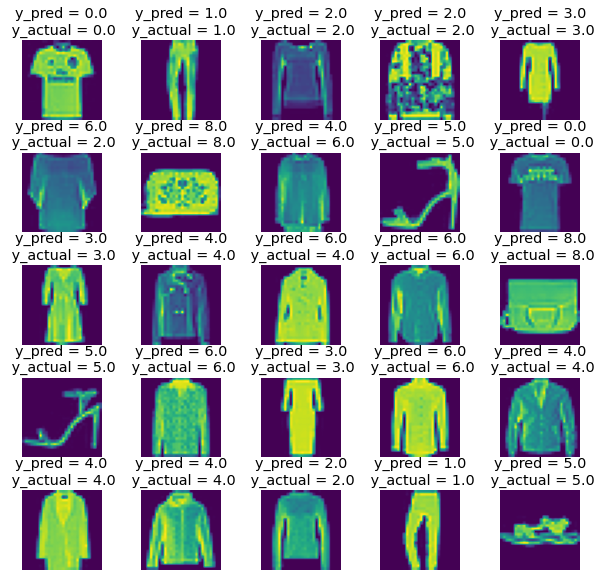

In [35]:
l = 5
w = 5

fig, axes = plt.subplots(l,w, figsize=(10,10))
axes = axes.ravel()

for i in np.arange(0, l*w):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('y_pred = {:0.1f}\n y_actual = {:0.1f}'.format( y_pred[i], y_test[i]))
    axes[i].axis("off")

plt.subplots_adjust(wspace=0.5)
